In [1]:
import tensorflow as tf
import tensorflow_io as tfio
from models.vqvae import *
from IPython import display

import glob
import imageio
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf
import tensorflow_probability as tfp
import time
from loader import *

from IPython.display import Audio 
import librosa
import librosa.display

/home/jerms/.pyenv/versions/3.8.12/lib/python3.8/site-packages/pydub/utils.py:170: RuntimeWarning: Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work
  warn("Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work", RuntimeWarning)


In [2]:
train_dataset, test_dataset = get_training_set()

2021-10-07 16:15:35.506921: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-10-07 16:15:35.532067: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-10-07 16:15:35.532722: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-10-07 16:15:35.533753: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

loading spectrogram
loading spectrogram


In [3]:
vqvae_trainer = VQVAETrainer(latent_dim=128, num_embeddings=128)
vqvae_trainer.load_weights("/home/jerms/daniil/new_vae/saved_models/vqvae_run_stft_2")
vqvae_trainer.compile(optimizer=keras.optimizers.Adam())

In [4]:
def get_predictions(model, test_samples):
    predictions = model.vqvae(test_samples)
    return predictions

In [5]:
for test_batch in test_dataset.take(1):
    test_sample = test_batch[0][0:16, :, :, :]

2021-10-07 16:15:36.776981: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


In [19]:
test_sample[0]

<tf.Tensor: shape=(1024, 88, 2), dtype=float32, numpy=
array([[[-1.7506871e-02,  0.0000000e+00],
        [-1.7981459e-01,  0.0000000e+00],
        [-1.7242752e-01,  0.0000000e+00],
        ...,
        [ 4.5640204e-02,  0.0000000e+00],
        [ 1.3946430e-01,  0.0000000e+00],
        [ 0.0000000e+00,  0.0000000e+00]],

       [[-1.0297655e-01, -7.9417809e-18],
        [ 1.5018368e-01, -1.7306948e-01],
        [ 1.6146831e-01,  1.7912981e-01],
        ...,
        [-1.0472121e-01,  1.2630914e-01],
        [-4.8387758e-03, -2.9413955e-02],
        [ 0.0000000e+00,  0.0000000e+00]],

       [[ 1.5995365e-01,  1.9353009e-17],
        [-2.4111876e-02,  1.0737146e-01],
        [-1.2184188e-01, -1.8032359e-01],
        ...,
        [ 1.9728594e-01, -1.6891313e-01],
        [-1.8576048e-01,  9.3572415e-02],
        [ 0.0000000e+00,  0.0000000e+00]],

       ...,

       [[ 1.8350684e-04, -9.8662398e-18],
        [-6.5060021e-07,  9.2926792e-05],
        [-1.7650823e-06,  2.9965346e-07],
     

In [7]:
preds = get_predictions(vqvae_trainer, test_sample)

2021-10-07 16:15:41.474435: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8100


In [8]:
audio_index = 0

In [9]:
stft_ = test_sample[audio_index]
real_comp, imag_comp = stft_[:, :, 0].numpy(), stft_[:, :, 1].numpy()
stft = real_comp + imag_comp * 1j

In [10]:
stft_.shape

TensorShape([1024, 88, 2])

In [11]:
audio = librosa.istft(stft)

In [12]:
len(audio)

44457

In [13]:
Audio(audio, rate=22050)

# Good Original Audio

# Reconstructed

In [15]:
reconstructed_stft = preds[audio_index]
real_comp_, imag_comp_ = reconstructed_stft[:,:,0].numpy(), reconstructed_stft[:,:,1].numpy()
stft_ = real_comp_ + imag_comp_ * 1j

In [16]:
audio = librosa.istft(stft_)

In [17]:
Audio(audio, rate=22050)

In [18]:
stft_

array([[-1.7597087e-02-1.2834761e-03j, -2.2057746e-02+1.6066711e-05j,
        -2.2057746e-02+1.6067177e-05j, ...,
        -2.2057747e-02+1.6066711e-05j, -2.2057747e-02+1.6066711e-05j,
        -1.6844179e-02-4.4061579e-03j],
       [ 3.1066127e-05-3.8624275e-05j,  4.1437335e-05-1.4941674e-05j,
         4.1437335e-05-1.4941674e-05j, ...,
         4.1437335e-05-1.4941674e-05j,  4.1437335e-05-1.4941674e-05j,
         4.4562854e-05-3.6143698e-05j],
       [ 3.1067058e-05-3.8624275e-05j,  4.1437335e-05-1.4941674e-05j,
         4.1437335e-05-1.4941674e-05j, ...,
         4.1437335e-05-1.4941674e-05j,  4.1437335e-05-1.4941674e-05j,
         4.4562854e-05-3.6143698e-05j],
       ...,
       [ 3.1066127e-05-3.8624275e-05j,  4.1437335e-05-1.4941674e-05j,
         4.1437335e-05-1.4941674e-05j, ...,
         4.1438267e-05-1.4941674e-05j,  4.1438267e-05-1.4941674e-05j,
         4.4560991e-05-3.6144163e-05j],
       [ 3.1066127e-05-3.8624275e-05j,  4.1438267e-05-1.4941674e-05j,
         4.1438267e-05

In [29]:
preds[6][:,:,0]

<tf.Tensor: shape=(1024, 88), dtype=float32, numpy=
array([[-5.48046e-05, -5.48046e-05, -5.48046e-05, ..., -5.48046e-05,
        -5.48046e-05, -5.48046e-05],
       [-5.48046e-05, -5.48046e-05, -5.48046e-05, ..., -5.48046e-05,
        -5.48046e-05, -5.48046e-05],
       [-5.48046e-05, -5.48046e-05, -5.48046e-05, ..., -5.48046e-05,
        -5.48046e-05, -5.48046e-05],
       ...,
       [-5.48046e-05, -5.48046e-05, -5.48046e-05, ..., -5.48046e-05,
        -5.48046e-05, -5.48046e-05],
       [-5.48046e-05, -5.48046e-05, -5.48046e-05, ..., -5.48046e-05,
        -5.48046e-05, -5.48046e-05],
       [-5.48046e-05, -5.48046e-05, -5.48046e-05, ..., -5.48046e-05,
        -5.48046e-05, -5.48046e-05]], dtype=float32)>

In [38]:
np.log(test_sample)

/tmp/ipykernel_16333/731765795.py:1: RuntimeWarning: divide by zero encountered in log
  np.log(test_sample)
/tmp/ipykernel_16333/731765795.py:1: RuntimeWarning: invalid value encountered in log
  np.log(test_sample)


array([[[[-3.05837345e+00,            -inf],
         [            nan,            -inf],
         [            nan,            -inf],
         ...,
         [-9.13183317e-02,            -inf],
         [ 7.52485752e-01,            -inf],
         [           -inf,            -inf]],

        [[            nan,             nan],
         [-3.19438362e+00,             nan],
         [-4.48919582e+00,             nan],
         ...,
         [-1.76284719e+00, -2.51553535e-01],
         [            nan, -8.19919288e-01],
         [           -inf,            -inf]],

        [[-2.03401923e+00,             nan],
         [            nan,             nan],
         [-2.90356684e+00, -3.97769570e+00],
         ...,
         [            nan, -8.88949394e-01],
         [ 6.87766433e-01,             nan],
         [           -inf,            -inf]],

        ...,

        [[            nan,             nan],
         [-1.28424387e+01,             nan],
         [-1.33931427e+01, -1.27138357

/home/jerms/.pyenv/versions/3.8.12/lib/python3.8/site-packages/librosa/core/spectrum.py:1641: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(np.abs(S)) instead.
  warnings.warn(


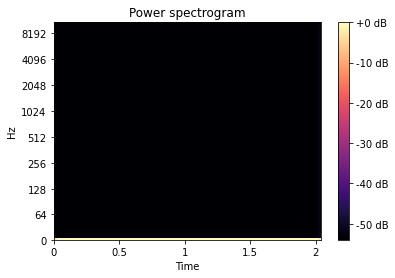

In [20]:
fig, ax = plt.subplots()
img = librosa.display.specshow(librosa.amplitude_to_db(stft_,
                                                       ref=np.max),
                               y_axis='log', x_axis='time', ax=ax)
ax.set_title('Power spectrogram')
fig.colorbar(img, ax=ax, format="%+2.0f dB")

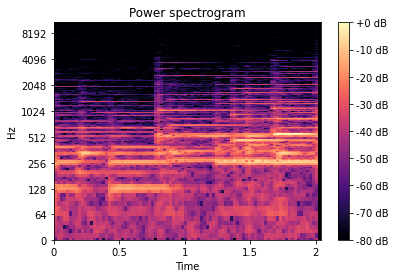

In [21]:
fig, ax = plt.subplots()
img = librosa.display.specshow(librosa.amplitude_to_db(stft,
                                                       ref=np.max),
                               y_axis='log', x_axis='time', ax=ax)
ax.set_title('Power spectrogram')
fig.colorbar(img, ax=ax, format="%+2.0f dB")


In [22]:
stft_

array([[-1.7597087e-02-1.2834761e-03j, -2.2057746e-02+1.6066711e-05j,
        -2.2057746e-02+1.6067177e-05j, ...,
        -2.2057747e-02+1.6066711e-05j, -2.2057747e-02+1.6066711e-05j,
        -1.6844179e-02-4.4061579e-03j],
       [ 3.1066127e-05-3.8624275e-05j,  4.1437335e-05-1.4941674e-05j,
         4.1437335e-05-1.4941674e-05j, ...,
         4.1437335e-05-1.4941674e-05j,  4.1437335e-05-1.4941674e-05j,
         4.4562854e-05-3.6143698e-05j],
       [ 3.1067058e-05-3.8624275e-05j,  4.1437335e-05-1.4941674e-05j,
         4.1437335e-05-1.4941674e-05j, ...,
         4.1437335e-05-1.4941674e-05j,  4.1437335e-05-1.4941674e-05j,
         4.4562854e-05-3.6143698e-05j],
       ...,
       [ 3.1066127e-05-3.8624275e-05j,  4.1437335e-05-1.4941674e-05j,
         4.1437335e-05-1.4941674e-05j, ...,
         4.1438267e-05-1.4941674e-05j,  4.1438267e-05-1.4941674e-05j,
         4.4560991e-05-3.6144163e-05j],
       [ 3.1066127e-05-3.8624275e-05j,  4.1438267e-05-1.4941674e-05j,
         4.1438267e-05